# Chapter 3 - Optimal Flows (Julia Code)

## Bellman’s Method

Here we demonstrate solving a shortest path problem using Belmman's method. Our first step is to set up the cost function, which we store as an array called $c$. Note that we set $c[i, j] = Inf$ when no edge exists from $i$ to $j$.

In [1]:
c = fill(Inf, (7, 7))
c[1, 2], c[1, 3], c[1, 4] = 1, 5, 3
c[2, 4], c[2, 5] = 9, 6
c[3, 6] = 2
c[4, 6] = 4
c[5, 7] = 4
c[6, 7] = 1
c[7, 7] = 0

0

Next we define the Bellman operator.

In [2]:
function T(q)
    Tq = similar(q)
    n = length(q)
    for x in 1:n
        Tq[x] = minimum(c[x, :] + q[:])
    end
    return Tq
end

T (generic function with 1 method)

Now we arbitraryly set $𝑞 ≡ 0$, generate the sequence of iterates $𝑇𝑞$, $𝑇^2𝑞$, $𝑇^3𝑞$ and plot them. By $𝑇^3 $𝑞$ has already converged on $𝑞^∗$.

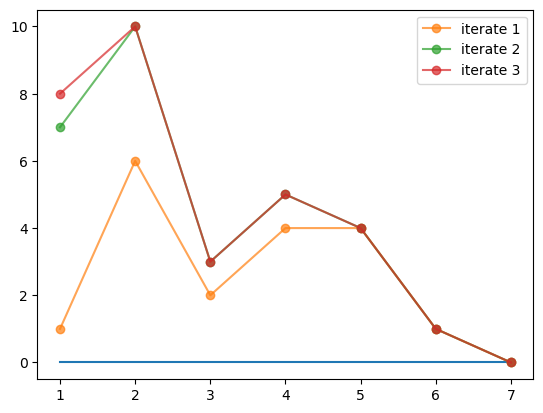

PyObject <matplotlib.legend.Legend object at 0x7fa54ee6f760>

In [3]:
using PyPlot
fig, ax = plt.subplots()

n = 7
q = zeros(n)
ax.plot(1:n, q)

for i in 1:3
    new_q = T(q)
    ax.plot(1:n, new_q, "-o", alpha=0.7, label ="iterate $i")
    q = new_q
end

ax.legend()

## Linear programming
When solving linear programs, one option is to use a domain specific modeling language to set out the objective and constraints in the optimization problem. Here we demonstrate the Julia package JuMP.

In [4]:
using JuMP
using GLPK

We create our model object and select our solver.

In [5]:
m = Model()
set_optimizer(m, GLPK.Optimizer)

Now we add variables, constraints and an objective to our model.

In [6]:
@variable(m, q1 >= 0)
@variable(m, q2 >= 0)
@constraint(m, 2q1 + 5q2 <= 30)
@constraint(m, 4q1 + 2q2 <= 20)
@objective(m, Max, 3q1 + 4q2)

3 q1 + 4 q2

Finally we solve our linear program.

In [7]:
optimize!(m)

println(value.(q1)) 
println(value.(q2))

2.5
5.0
